In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# import accuracy_score
from sklearn.metrics import accuracy_score
# import classification_report
from sklearn.metrics import classification_report
# Import DecisionBoundaryDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
# Load the dataset
data = pd.read_csv('../Life_Expectancy_preprocessed_v2.csv')  # Replace 'your_data.csv' with the actual file path

# Data preprocessing
X = data[['Year', 'Adult Mortality', 'Developed']]
X = X.dropna()  # Remove rows with missing values
y = X['Developed']
X = X[['Year', 'Adult Mortality']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Feature scaling
# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear', C=1.0)

# Fit the SVM model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 84.55%
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       279
           1       0.00      0.00      0.00        51

    accuracy                           0.85       330
   macro avg       0.42      0.50      0.46       330
weighted avg       0.71      0.85      0.77       330



/Users/jules/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jules/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jules/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


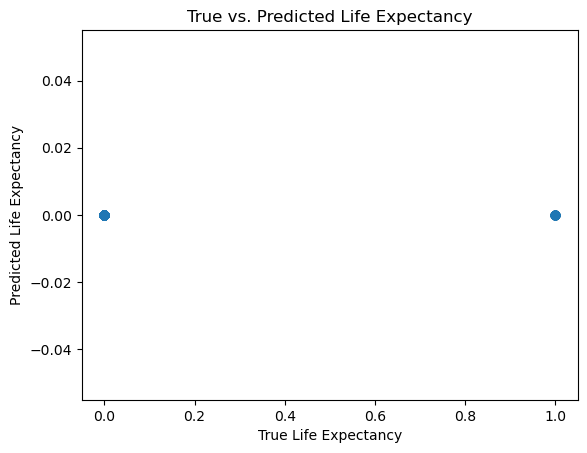

In [6]:
# Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel("True Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("True vs. Predicted Life Expectancy")
plt.show()

/Users/jules/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Year')

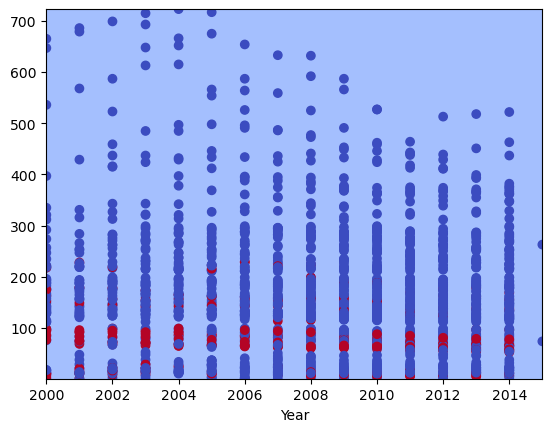

In [9]:
# Assuming clf is your SVM classifier and xx, yy define your grid
xx, yy = np.meshgrid(np.linspace(X['Year'].min(), X['Year'].max(), 100),
                    np.linspace(X['Adult Mortality'].min(), X['Adult Mortality'].max(), 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['Year'], X['Adult Mortality'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.title(f'SVC Decision Boundary (Accuracy: {accuracy:.2f})')
plt.show()